# Decision Tree

# log

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


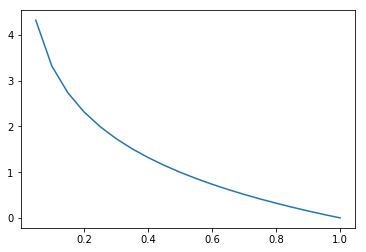

In [2]:
x = np.arange(0, 1.05, 0.05)
y = -np.log2(x)
plt.plot(x, y)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


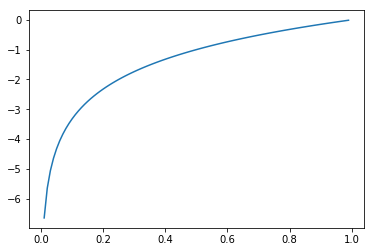

In [3]:
x = np.arange(0, 1, 0.01)
y = np.log2(x)
plt.plot(x, y)

# Entropy

information => ถาม
เฉลี่ยแล้วถามกี่ครั้งจึงจะได้คำตอบ

ถ้ารู้แน่ๆ ก็ไม่ต้องถาม H = 0
โอกาสครึ่งๆ ก็ถาม 1 คำถาม

In [4]:
from math import log2
P = [0.2, 1/3, 0.5, 2/3, 0.8, 1]
s = '{:>7} ' * 2
print(s.format('p', 'log_2'))
s = s.replace('}', '.3f}')

for p in P:
    print(s.format(p, log2(p)))

      p   log_2 
  0.200  -2.322 
  0.333  -1.585 
  0.500  -1.000 
  0.667  -0.585 
  0.800  -0.322 
  1.000   0.000 


In [5]:
'''
from math import log2
def entropy(a):
    sum = 0
    for p in a:
        if p != 0:   # log2(0) ValueError: math domain error
            sum -= p * log2(p)
    return sum
'''
def entropy(p):
    p = p[p != 0]   # filter
    return (-p * np.log2(p)).sum()

In [6]:
a = np.array([1, 0])
entropy(a)

0.0

In [7]:
a = np.array([0.5, 0.5])
entropy(a)

1.0

In [8]:
a = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
entropy(a)

2.584962500721156

In [9]:
a = np.array([1/2, 1/10, 1/10, 1/10, 1/10, 1/10])
entropy(a)

2.1609640474436813

In [10]:
from ipywidgets import interact

def f(p): return entropy(np.array([p, 1-p]))

interact(f, p=(0, 1, 0.1))

0.0

<function __main__.f(p)>

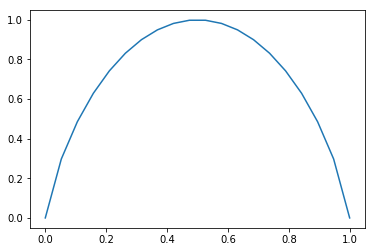

In [11]:
x = np.linspace(0, 1, 20)
s = np.stack((x,1-x), axis=1)  # create 2d array from two 1d array
y = np.apply_along_axis(entropy, 1, s)   # want to use vectorize
plt.plot(x, y)

In [12]:
P = [1/2, 1/3, 1/4, 1/7, 2/5, 3/7]
s = '{:>7} ' * 3
print(s.format('p', '1-p', 'entropy'))
s = s.replace('}', '.3f}')
for p in P:
    print(s.format(p, 1-p, entropy(np.array([p, 1-p]))))

      p     1-p entropy 
  0.500   0.500   1.000 
  0.333   0.667   0.918 
  0.250   0.750   0.811 
  0.143   0.857   0.592 
  0.400   0.600   0.971 
  0.429   0.571   0.985 


In [13]:
# max entropy
x = np.arange(2, 11)
y = 

SyntaxError: invalid syntax (<ipython-input-13-1b15986b4ccf>, line 3)

In [ ]:
x = np.array([[1,2],[3,4]])
x[0]

# Decision Tree

In [14]:
a = [9/14, 5/14]
entropy(np.array(a))

0.9402859586706309

In [33]:
def avg_entropy(a):
    total = sum(sum(b) for b in a)
    avg = 0
    for b in a:
        c = [i/sum(b) for i in b]
        avg += entropy(np.array(c)) * sum(b) / total
    return avg

In [38]:
avg_entropy([[3,3], [6,2]])

0.8921589282623617